## Project 1 : Earthquakes in Greece in 2018 



### Greece is one of the world's most seismically active countries, as along with Italy and Turkey it sits on the meeting point of the African and Eurasian tectonic plates. Fortunately, most Greek earthquakes are relatively mild but there is always the potential for more severe seismic activity, as the 1999 Athens earthquake, which had a magnitude of 6 and killed 143 people.  

### I have found this set http://www.geophysics.geol.uoa.gr/stations/maps/recent.html from the Geophysics Dept. of the University of Athens, Greece. It contains geographical, chronological and earthquake measuring data from 01.01.2018 until today.

In [1]:
import pandas as pd
import matplotlib
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image 
from cycler import cycler


In [32]:
df=pd.read_csv("event_output.tsv", delimiter=" ")
df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Lat,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Long,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Dep,Unnamed: 25,Mag,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,RMS,Unnamed: 38,Unnamed: 39,dx,Unnamed: 41,Unnamed: 42,Unnamed: 43,dy,Unnamed: 45,Unnamed: 46,Unnamed: 47,dz,Unnamed: 49,Unnamed: 50,Np,Unnamed: 52,Na,Gap
0,2018,7,10,15,29,15.91,NaN,37.6361,NaN,NaN,23.0872,NaN,NaN,10.0,NaN,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,4.0,NaN,4.0,-0.0,NaN,16.0,NaN,NaN,8.0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018,7,10,12,44,45.51,NaN,35.8716,NaN,NaN,24.2618,NaN,NaN,NaN,5.0,NaN,2.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,3.0,-0.0,NaN,10.0,NaN,NaN,6.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018,7,10,11,51,25.69,NaN,38.5067,NaN,NaN,21.6012,NaN,NaN,NaN,5.0,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,2.0,NaN,2.0,-0.0,NaN,25.0,NaN,19.0,NaN,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018,7,10,5,32,47.32,NaN,38.3658,NaN,NaN,21.8209,NaN,NaN,12.0,NaN,0.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,3.0,NaN,4.0,NaN,3.0,NaN,11.0,NaN,NaN,8.0,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018,7,10,5,18,19.65,NaN,38.5995,NaN,NaN,22.8017,NaN,NaN,10.0,NaN,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,NaN,2.0,NaN,2.0,-0.0,NaN,28.0,NaN,21.0,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### A word on cleaning: I got this as a .tsv file straight from the above url, I opened it in pandas and got 55 columns which had 2 main issues: some of them were completely full of NaN values and had to be dropped, whereas some series from the original had split data in 2 columns [eg. on index 0, I got magnitude level in column 15 and on index 1 in column 16] so I had to merge these and drop NaNs]

In [33]:
pd.set_option('display.max_columns', 500)

In [34]:
df.drop(['Unnamed: 6', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 49','Unnamed: 50'], axis=1, inplace=True)

In [35]:
df.drop(['Lat', 'Unnamed: 12', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43','Unnamed: 52','Na','Gap','Np','dy','dz','dx'], axis=1, inplace=True)

In [36]:
df.drop(['Unnamed: 38', 'Unnamed: 39'], axis=1, inplace=True)

In [37]:
df.drop(['Long', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22','Unnamed: 23',"Dep"], axis=1, inplace=True)

In [38]:
df ['mag'] = df['Unnamed: 15'].combine_first(df['Unnamed: 16'])

In [39]:
df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [40]:
df ['depth'] = df['Unnamed: 13'].combine_first(df['Unnamed: 14'])

In [41]:
df.drop(['Unnamed: 13', 'Unnamed: 14'], axis=1, inplace=True)

In [42]:
df.drop(['Mag', 'Unnamed: 25','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30', 'Unnamed: 31','Unnamed: 32','Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','RMS'], axis=1, inplace=True)

In [43]:
df.rename(index=str, columns={"Unnamed: 7": "Latitude", "Unnamed: 10": "Longitude"},inplace=True)

In [44]:
df.Mo = df.Mo.astype(str)

In [15]:
df.Mo = df.Mo.replace ({"1": "Jan","2":"Feb","3":"Mar","4":"Apr","5":"May","6":"Jun","7":"Jul"})

In [16]:
quakes_df = df

In [17]:
quakes_df.head()

,Year,Mo,Dy,Hr,Mn,Sec,Latitude,Longitude,mag,depth
0,2018,Jul,10,15,29,15.91,37.6361,23.0872,2.4,10.0
1,2018,Jul,10,12,44,45.51,35.8716,24.2618,2.1,5.0
2,2018,Jul,10,11,51,25.69,38.5067,21.6012,1.9,5.0
3,2018,Jul,10,5,32,47.32,38.3658,21.8209,0.9,12.0
4,2018,Jul,10,5,18,19.65,38.5995,22.8017,2.4,10.0


In [18]:
quakes_df.to_csv ("quakes.csv",index=False)

### Graph 1: All earthquakes as they happened


In [45]:
df.Year = df.Year.astype(str)
df.Mo = df.Mo.astype(str)
df.Dy = df.Dy.astype(str)
df.Hr = df.Hr.astype(str)
df.Mn = df.Mn.astype(str)
df.Sec = df.Sec.astype(str)
df ['DT'] = df.Year+"/"+"0"+df.Mo+"/"+df.Dy+","+df.Hr+","+df.Mn+","+df.Sec
df ['DT']=pd.to_datetime(df['DT'], format= "%Y/%m/%d,%H,%M,%S.%f")


In [46]:
df.sort_values (by='DT', inplace=True)

In [47]:
df3 = df

In [48]:
df3.head()

,Year,Mo,Dy,Hr,Mn,Sec,Latitude,Longitude,mag,depth,DT
4066,2018,1,1,0,59,33.19,38.1026,22.6207,1.6,10.0,2018-01-01 00:59:33.190
4065,2018,1,1,1,58,53.55,38.8927,21.5551,1.6,17.0,2018-01-01 01:58:53.550
4064,2018,1,1,3,5,8.84,38.3889,22.0982,0.2,5.0,2018-01-01 03:05:08.840
4063,2018,1,1,4,37,49.0,38.9170,26.5064,2.7,10.0,2018-01-01 04:37:49.000
4062,2018,1,1,4,48,26.5,38.0784,22.1278,1.5,31.0,2018-01-01 04:48:26.500


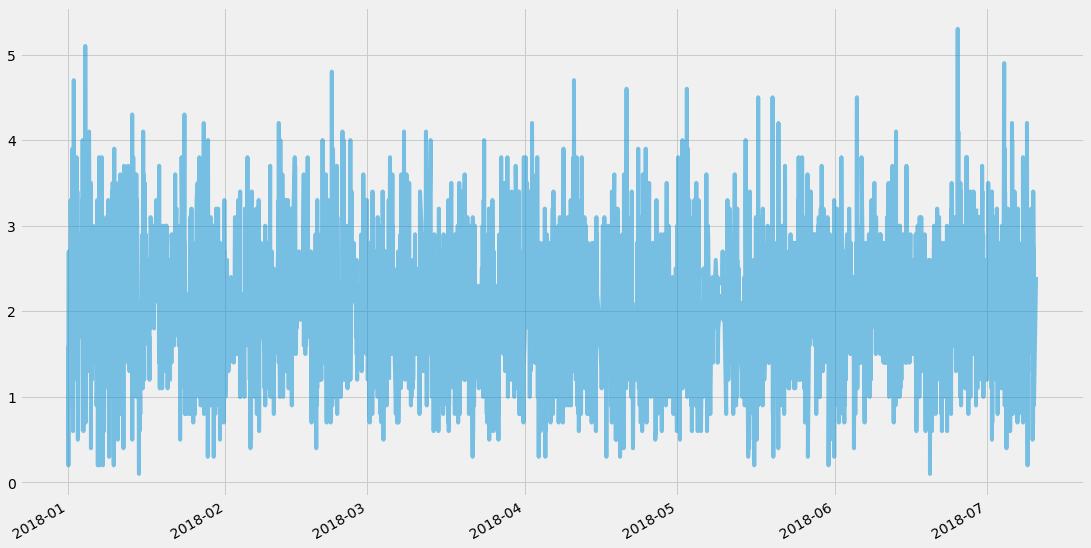

In [50]:
plt.style.use ('fivethirtyeight')
ax = df3.plot(x='DT', y = 'mag',alpha= 0.5, figsize=(17,10),legend=False)
ax.xaxis.label.set_visible(False)
#plt.savefig("hows.pdf")


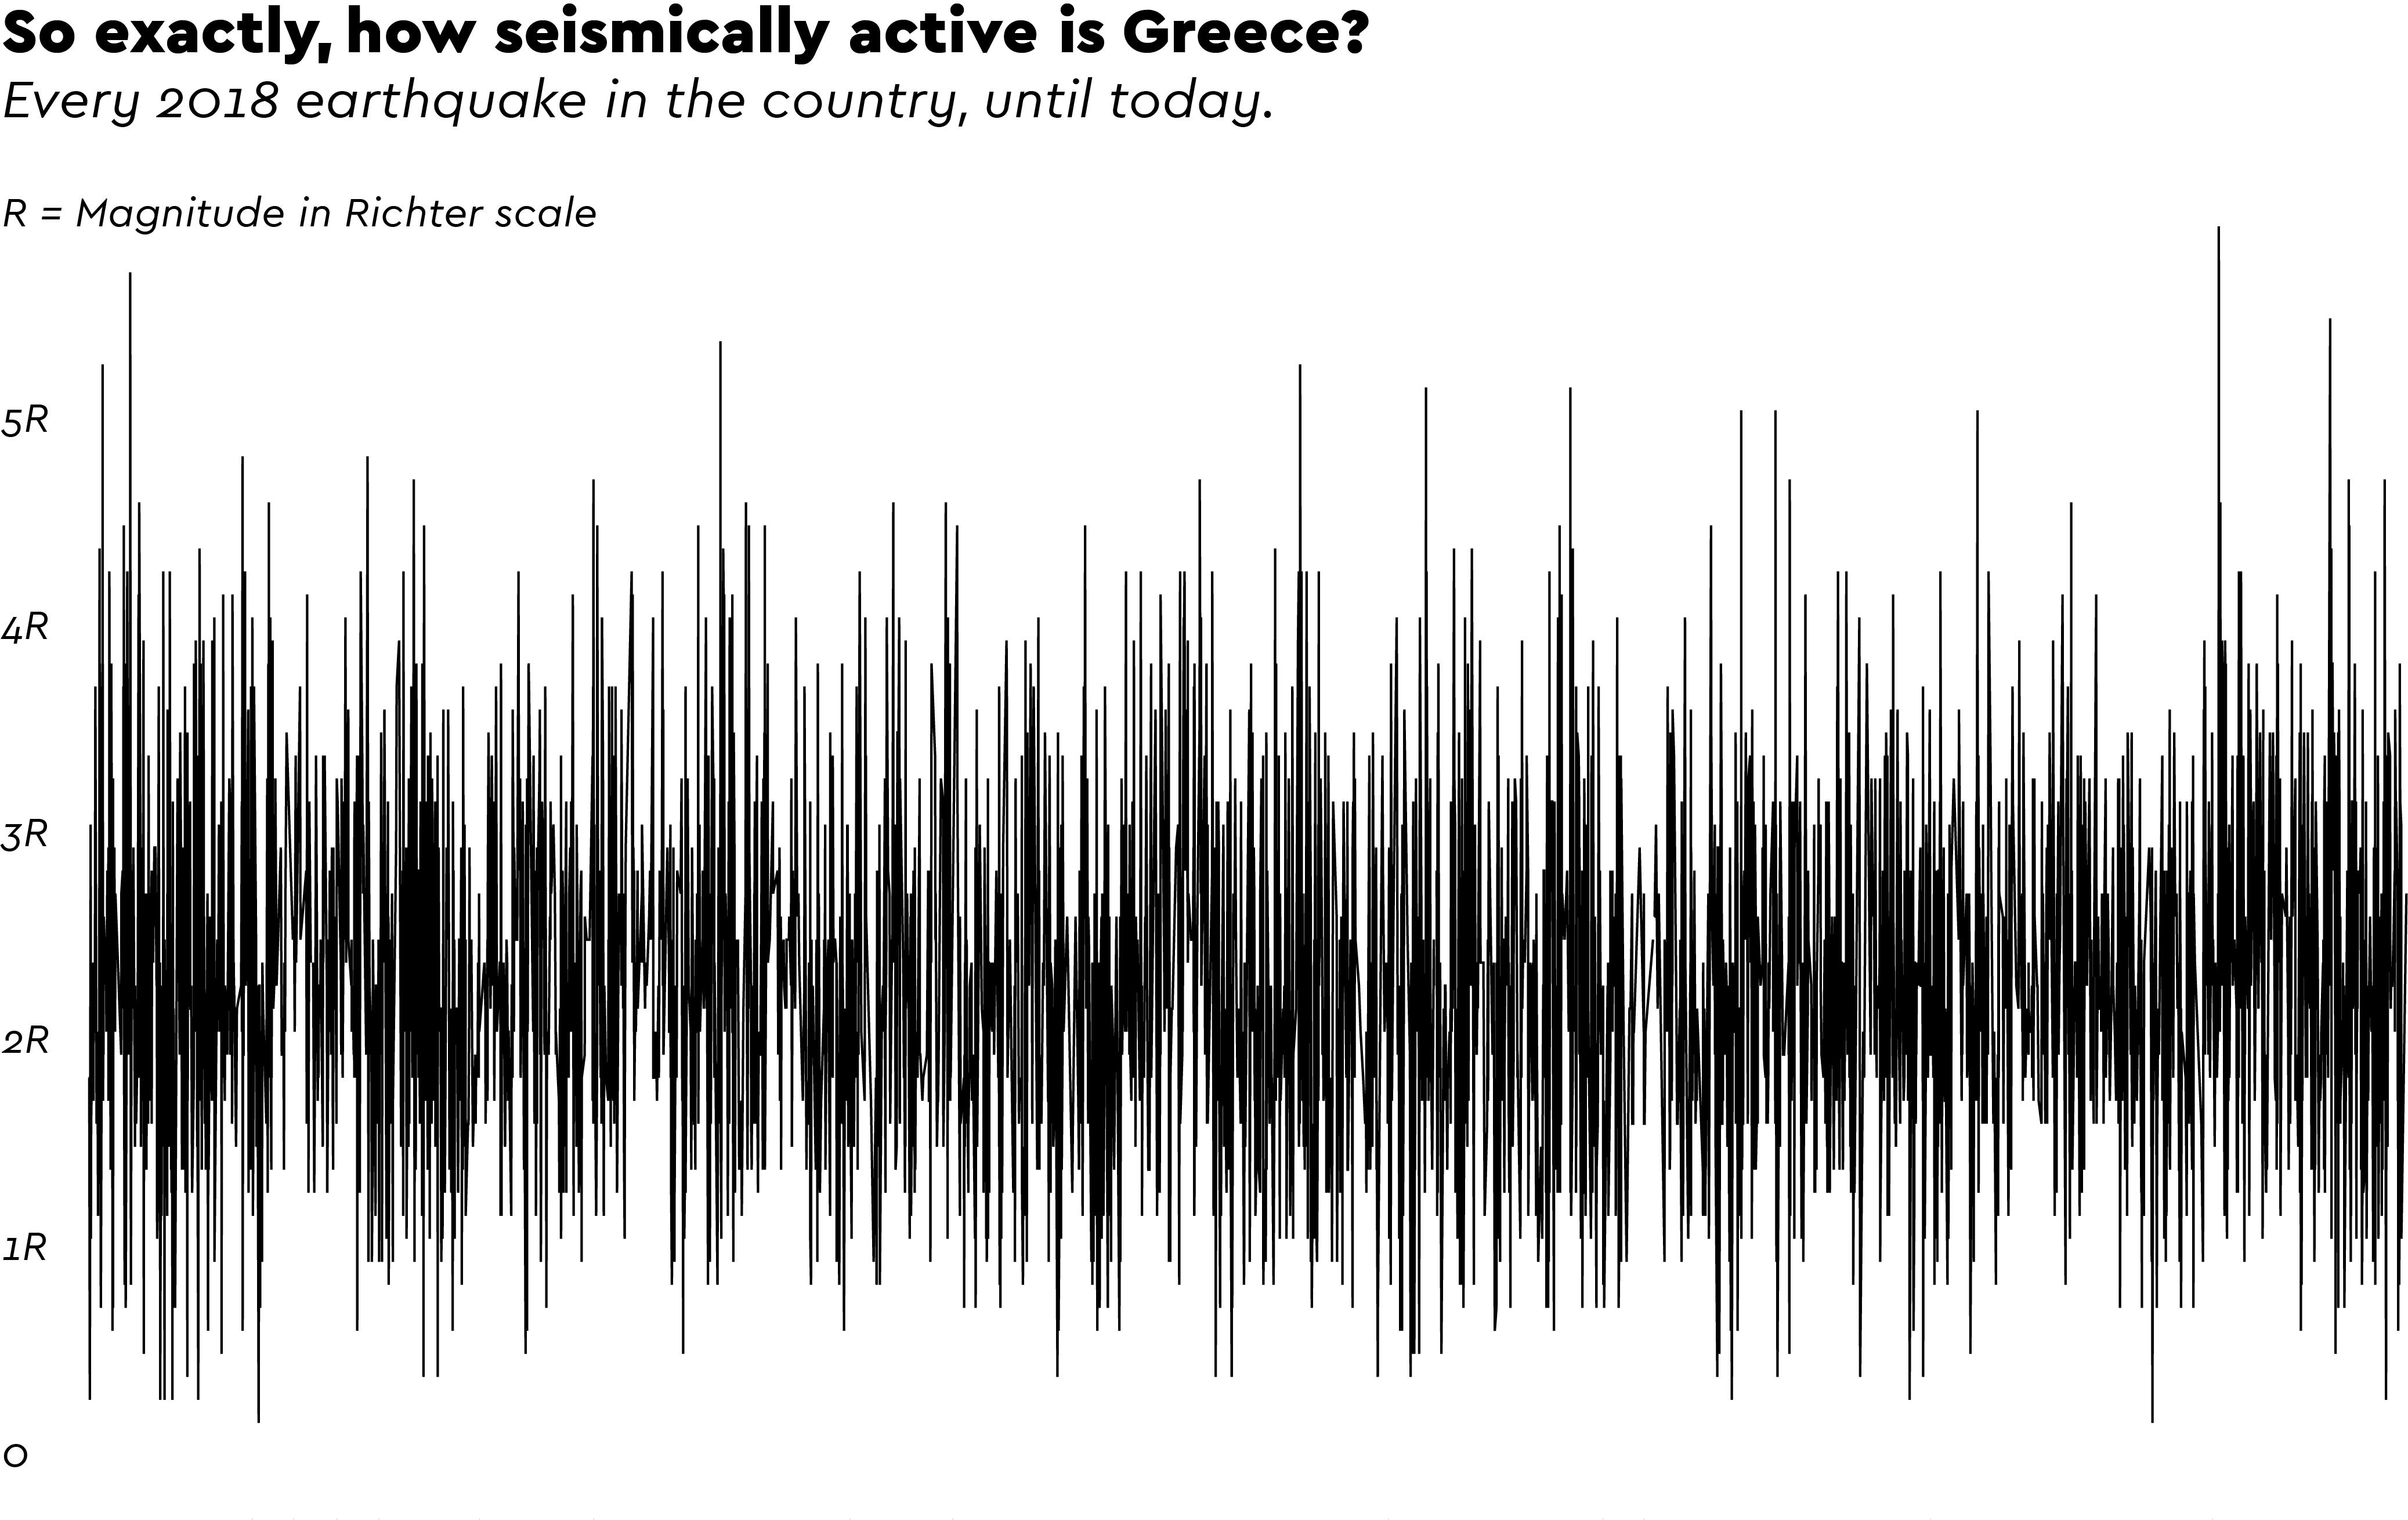

In [67]:
#After Adobe Illustrator 

Image(filename='qks_1.png')

### Graph 2: All earthquakes plotted per month

In [19]:
most_quakes_month = quakes_df.Mo.value_counts().sort_values(ascending=True)

In [20]:
most_quakes_month

Jul    285
Feb    523
Mar    577
May    622
Jun    635
Apr    670
Jan    755
Name: Mo, dtype: int64

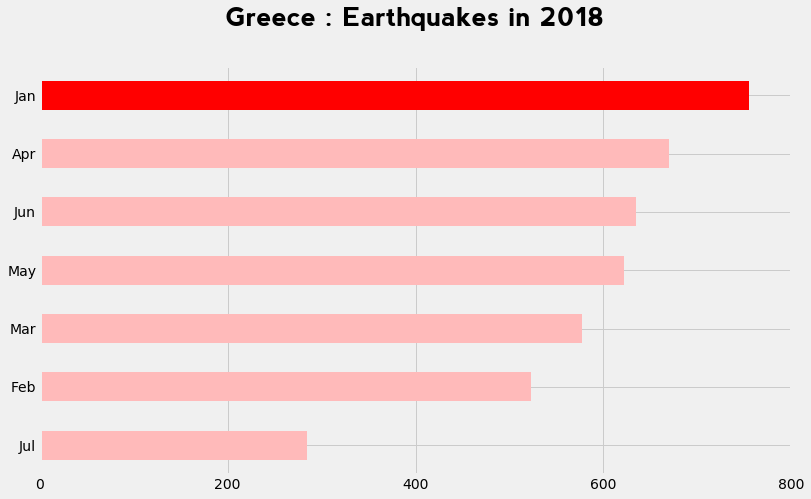

In [21]:
plt.style.use ('fivethirtyeight')
bar_colors = ['#ffbaba','#ffbaba','#ffbaba','#ffbaba','#ffbaba','#ffbaba','#ff0000']
most_quakes = most_quakes_month.plot(kind='barh', color=bar_colors,figsize=(12,7), legend=False)
most_quakes.set_xticks ([0,200,400,600,800])
most_quakes.set_title ("Greece : Earthquakes in 2018", pad = 40)
most_quakes.title.set_fontsize(27)
most_quakes.title.set_fontname("Nevis")
plt.savefig("allquakes.png")


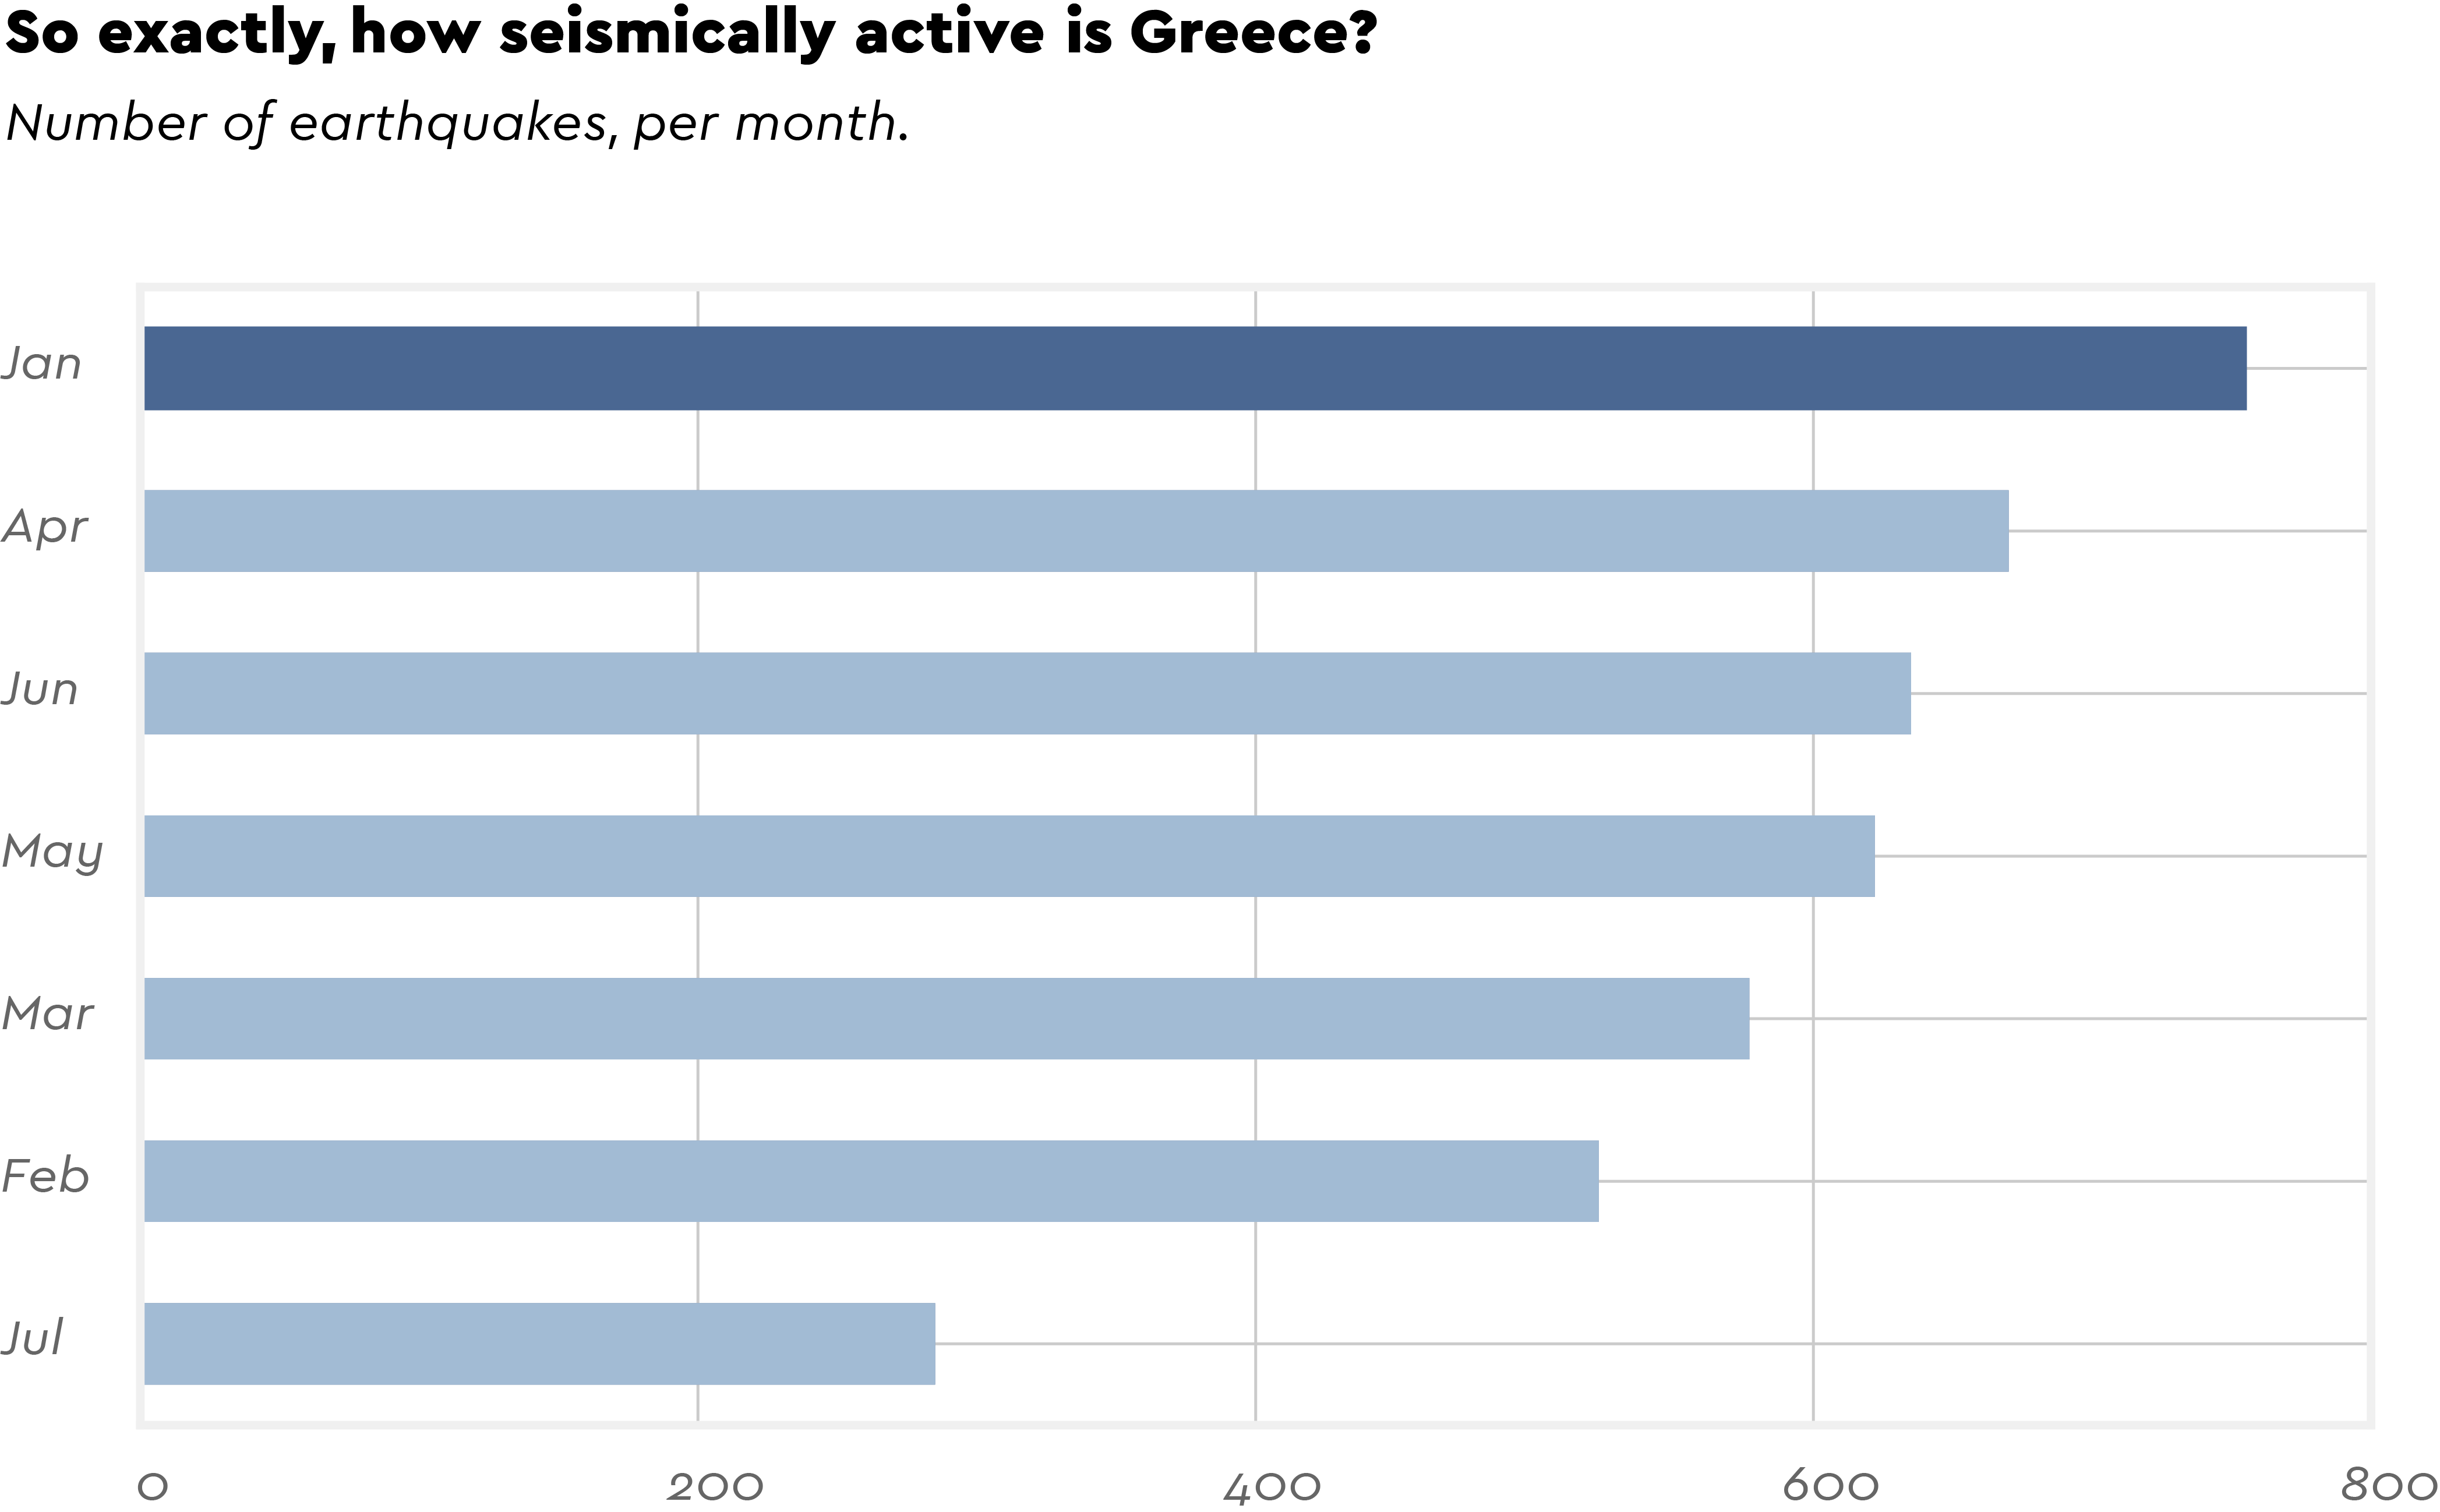

In [69]:
#After Adobe Illustrator 
Image(filename='qks_2.png')

### Graph 3: All earthquakes per magnitude and depth



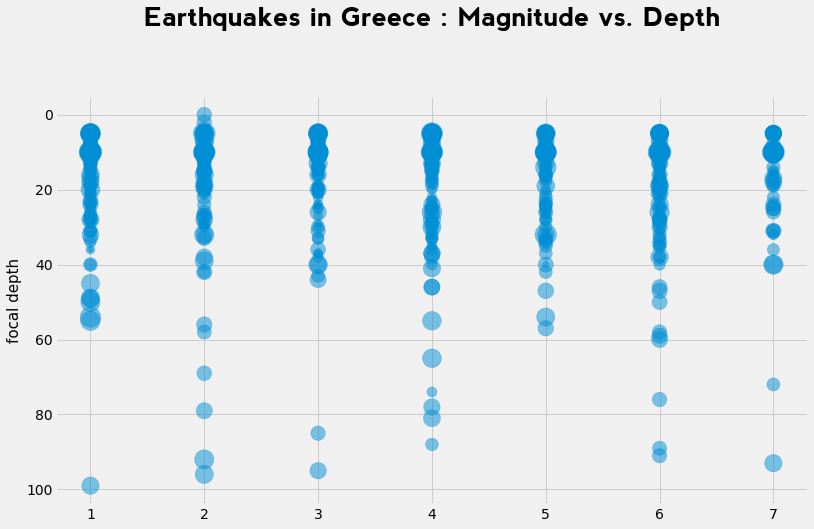

In [63]:
plt.style.use ('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x=df.dropna().Mo, y=df.dropna().depth, s=100 * df.dropna().mag, alpha=0.5)
plt.ylabel('focal depth', fontsize=15)
plt.gca().invert_yaxis()
ax.set_title ("Earthquakes in Greece : Magnitude vs. Depth", pad=70,fontsize=27,fontname="Nevis")
#plt.savefig("magvsdepth2.pdf")


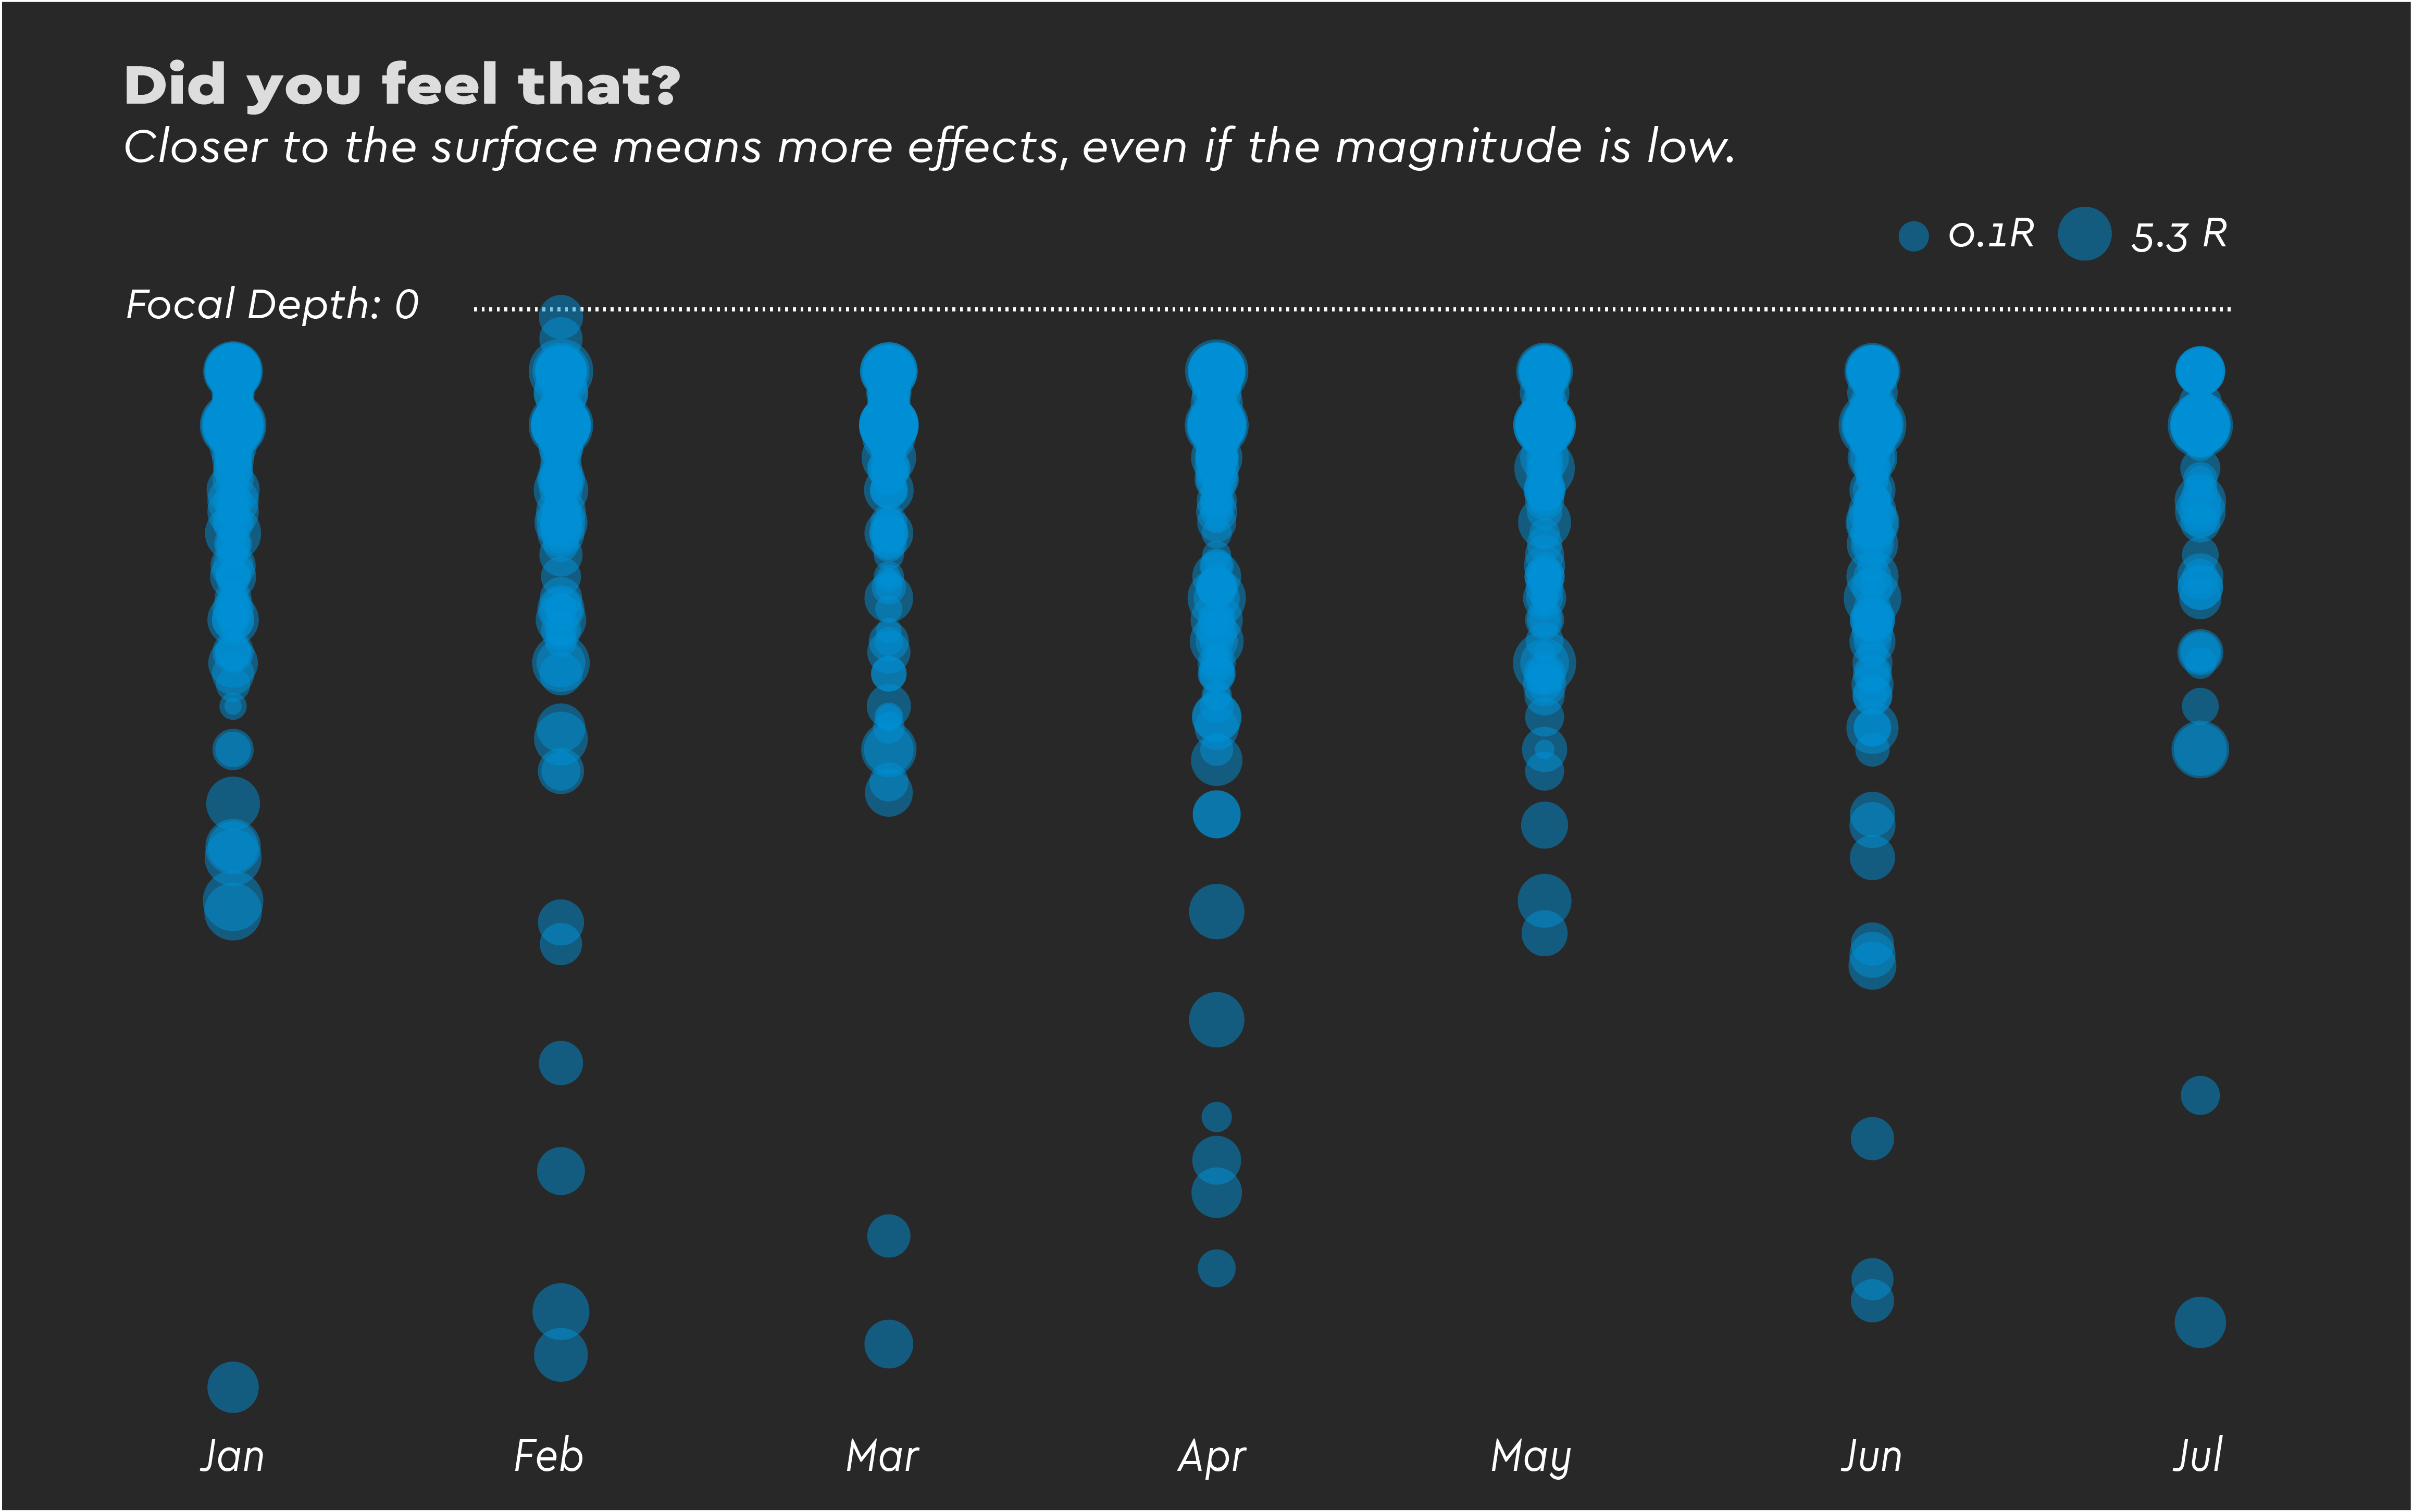

In [70]:
#After Adobe Illustrator 
Image(filename='qks_3.png')

### Graph 4: All quakes in Greece in 2018 on lattitude axis




In [24]:
df2 = df[['Latitude','mag','Mo']]

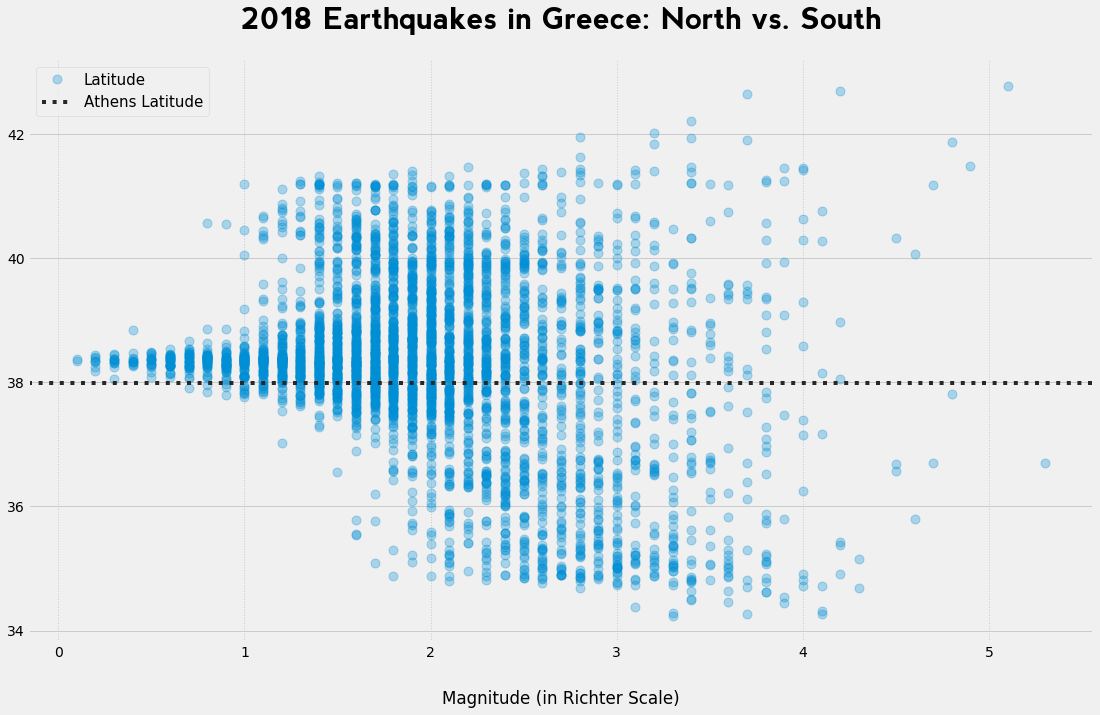

In [27]:

plt.style.use ('fivethirtyeight')
ax = df2.plot(y='Latitude', x='mag', marker='o', linestyle='', markersize=9, figsize=(17,10),alpha=0.3)
ax_Ath = plt.axhline(y=37.9838, color='#282828', linestyle=':',alpha = 1, label = 'Athens Latitude')
ax.legend(fontsize=15, loc=2)
ax.set_title ("2018 Earthquakes in Greece: North vs. South", pad = 30)
ax.title.set_fontsize(30)
ax.grid(True, axis = 'x', linestyle =":", linewidth=1)
ax.title.set_fontname("Nevis")
plt.xlabel('Magnitude (in Richter Scale)',labelpad=30)
ax.xaxis.label.set_visible(True)
plt.savefig("northvssouth.png")

In [78]:
#Percent of quakes >= Athens
df2 = df[['Latitude','mag','Mo']]
x = []
for i in df2.Latitude: 
    if i >= 37.9838 :
        x.append(i)
len (x) * 100/len (df2.Latitude)

69.28940250799114

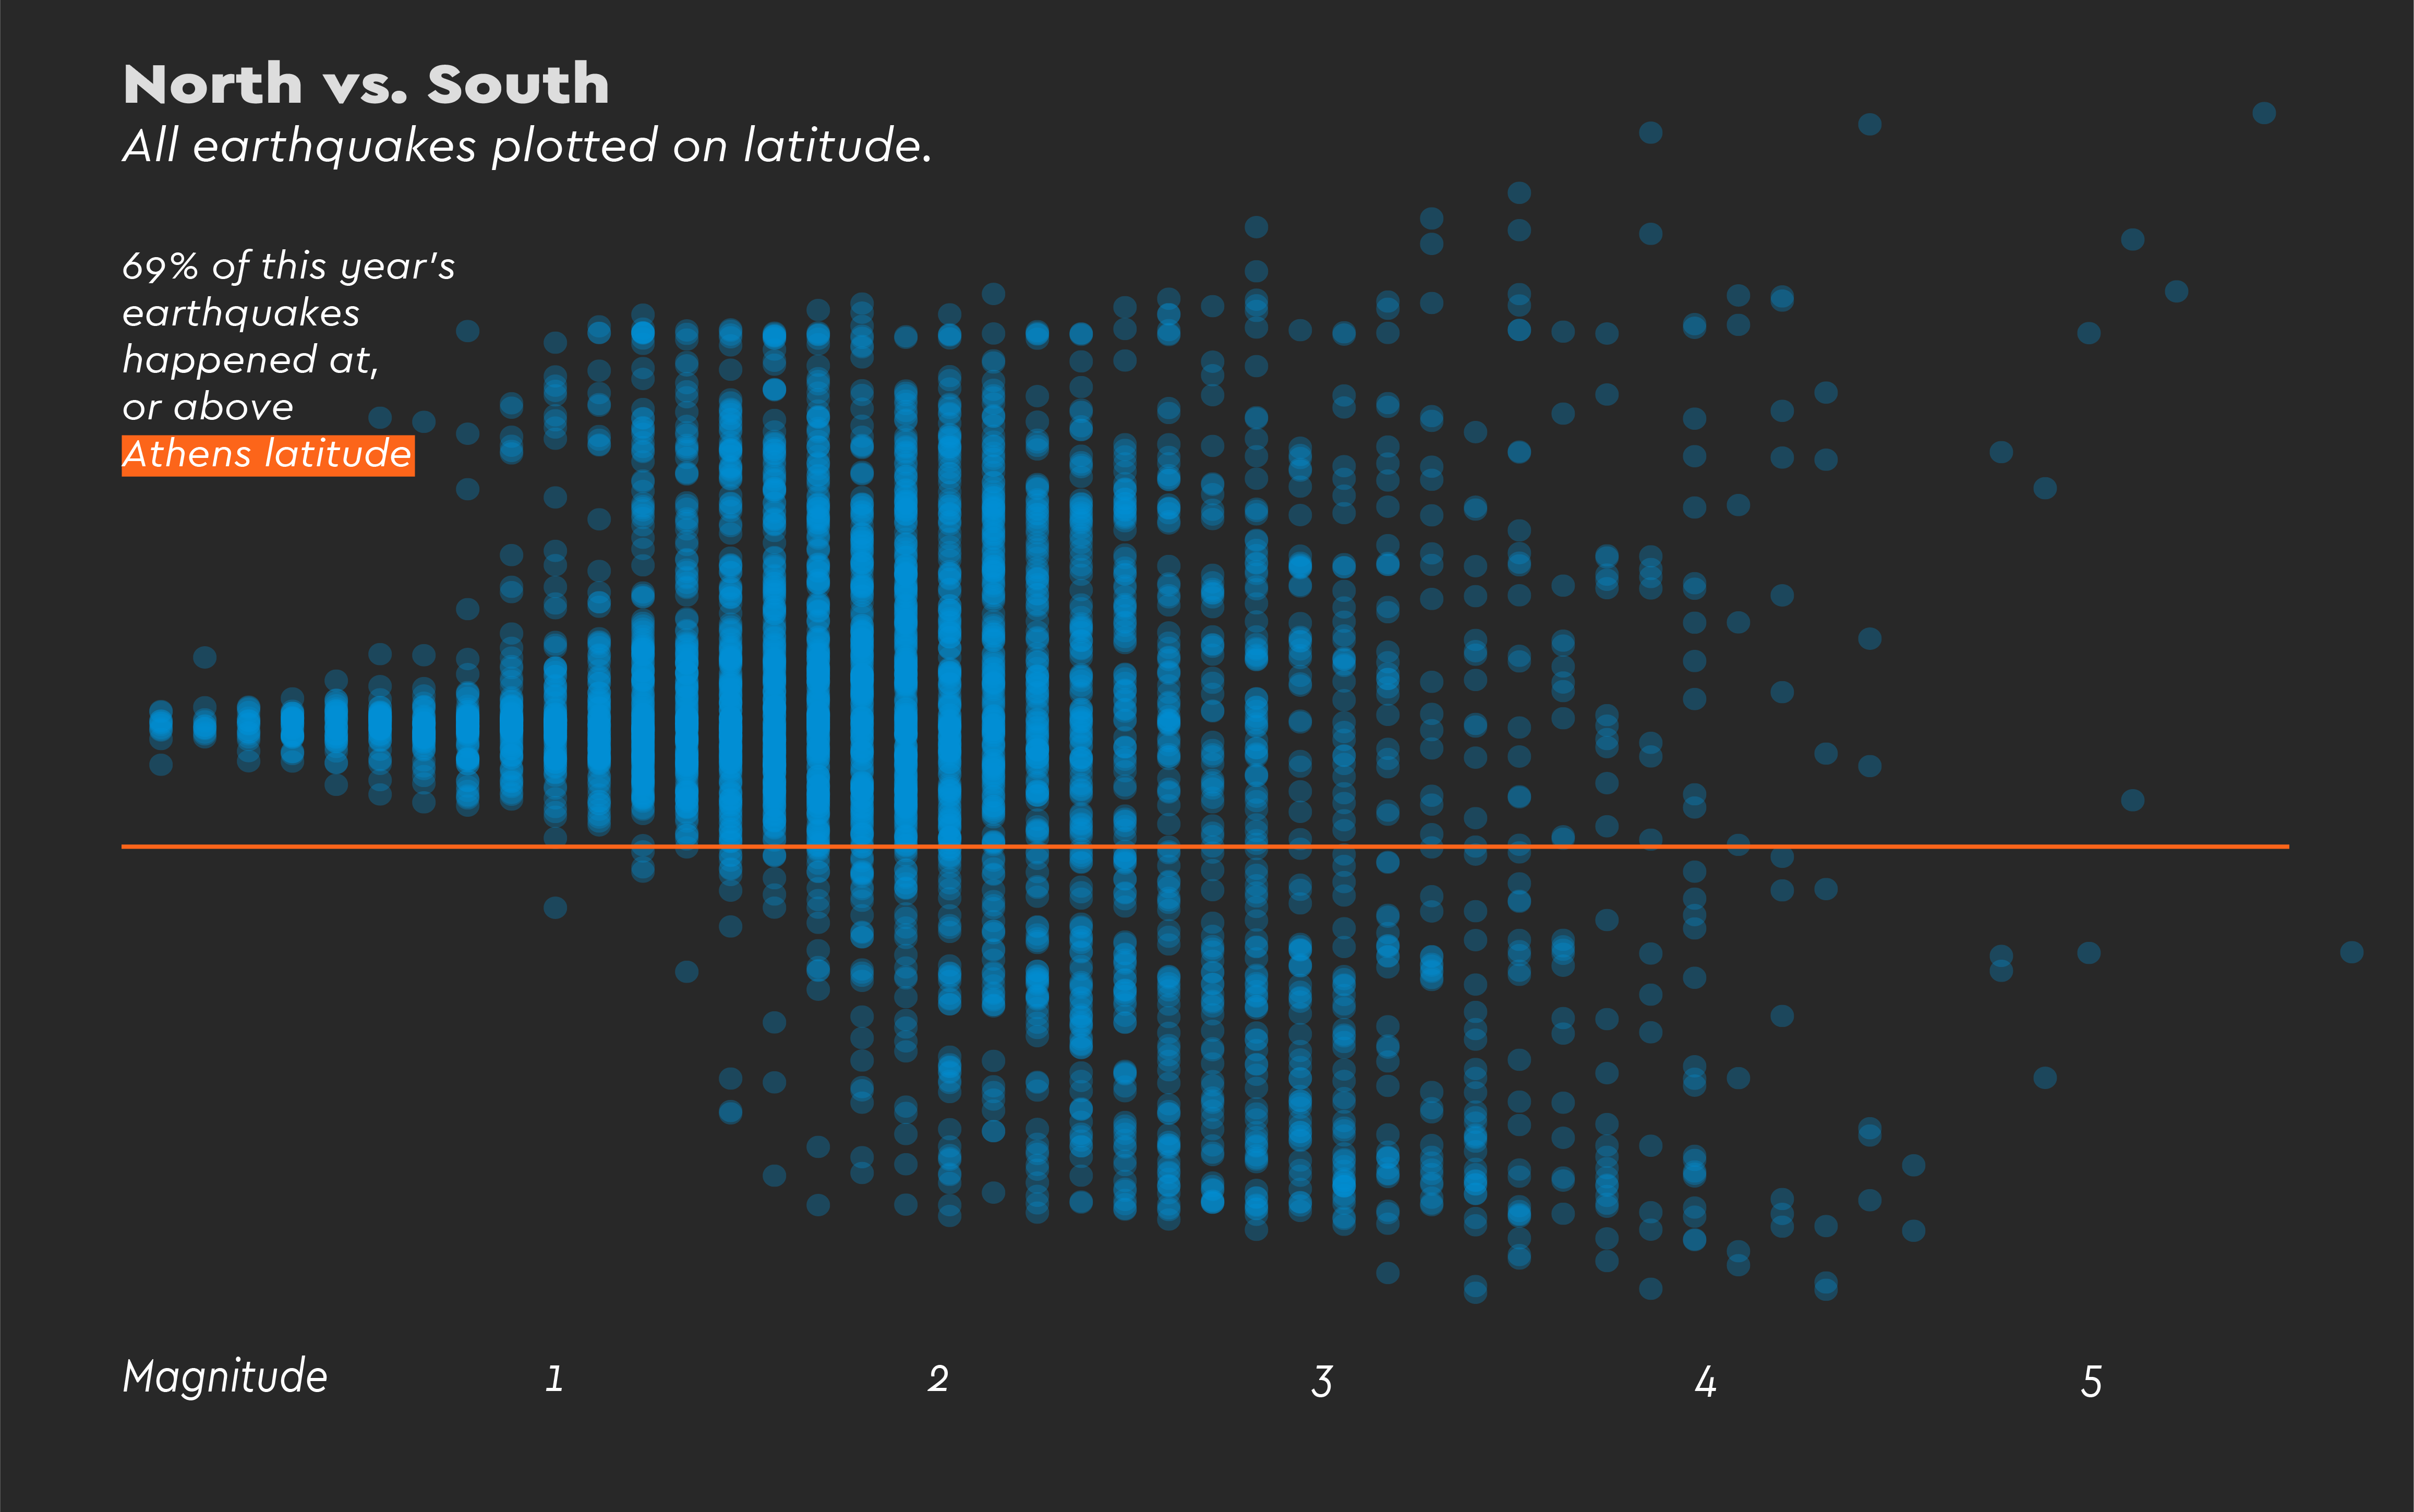

In [71]:
#After Adobe Illustrator 
Image(filename='qks_4.png')

### Graph 5. As they happened: All earthuakes above 2.7R on a map


## Mapped

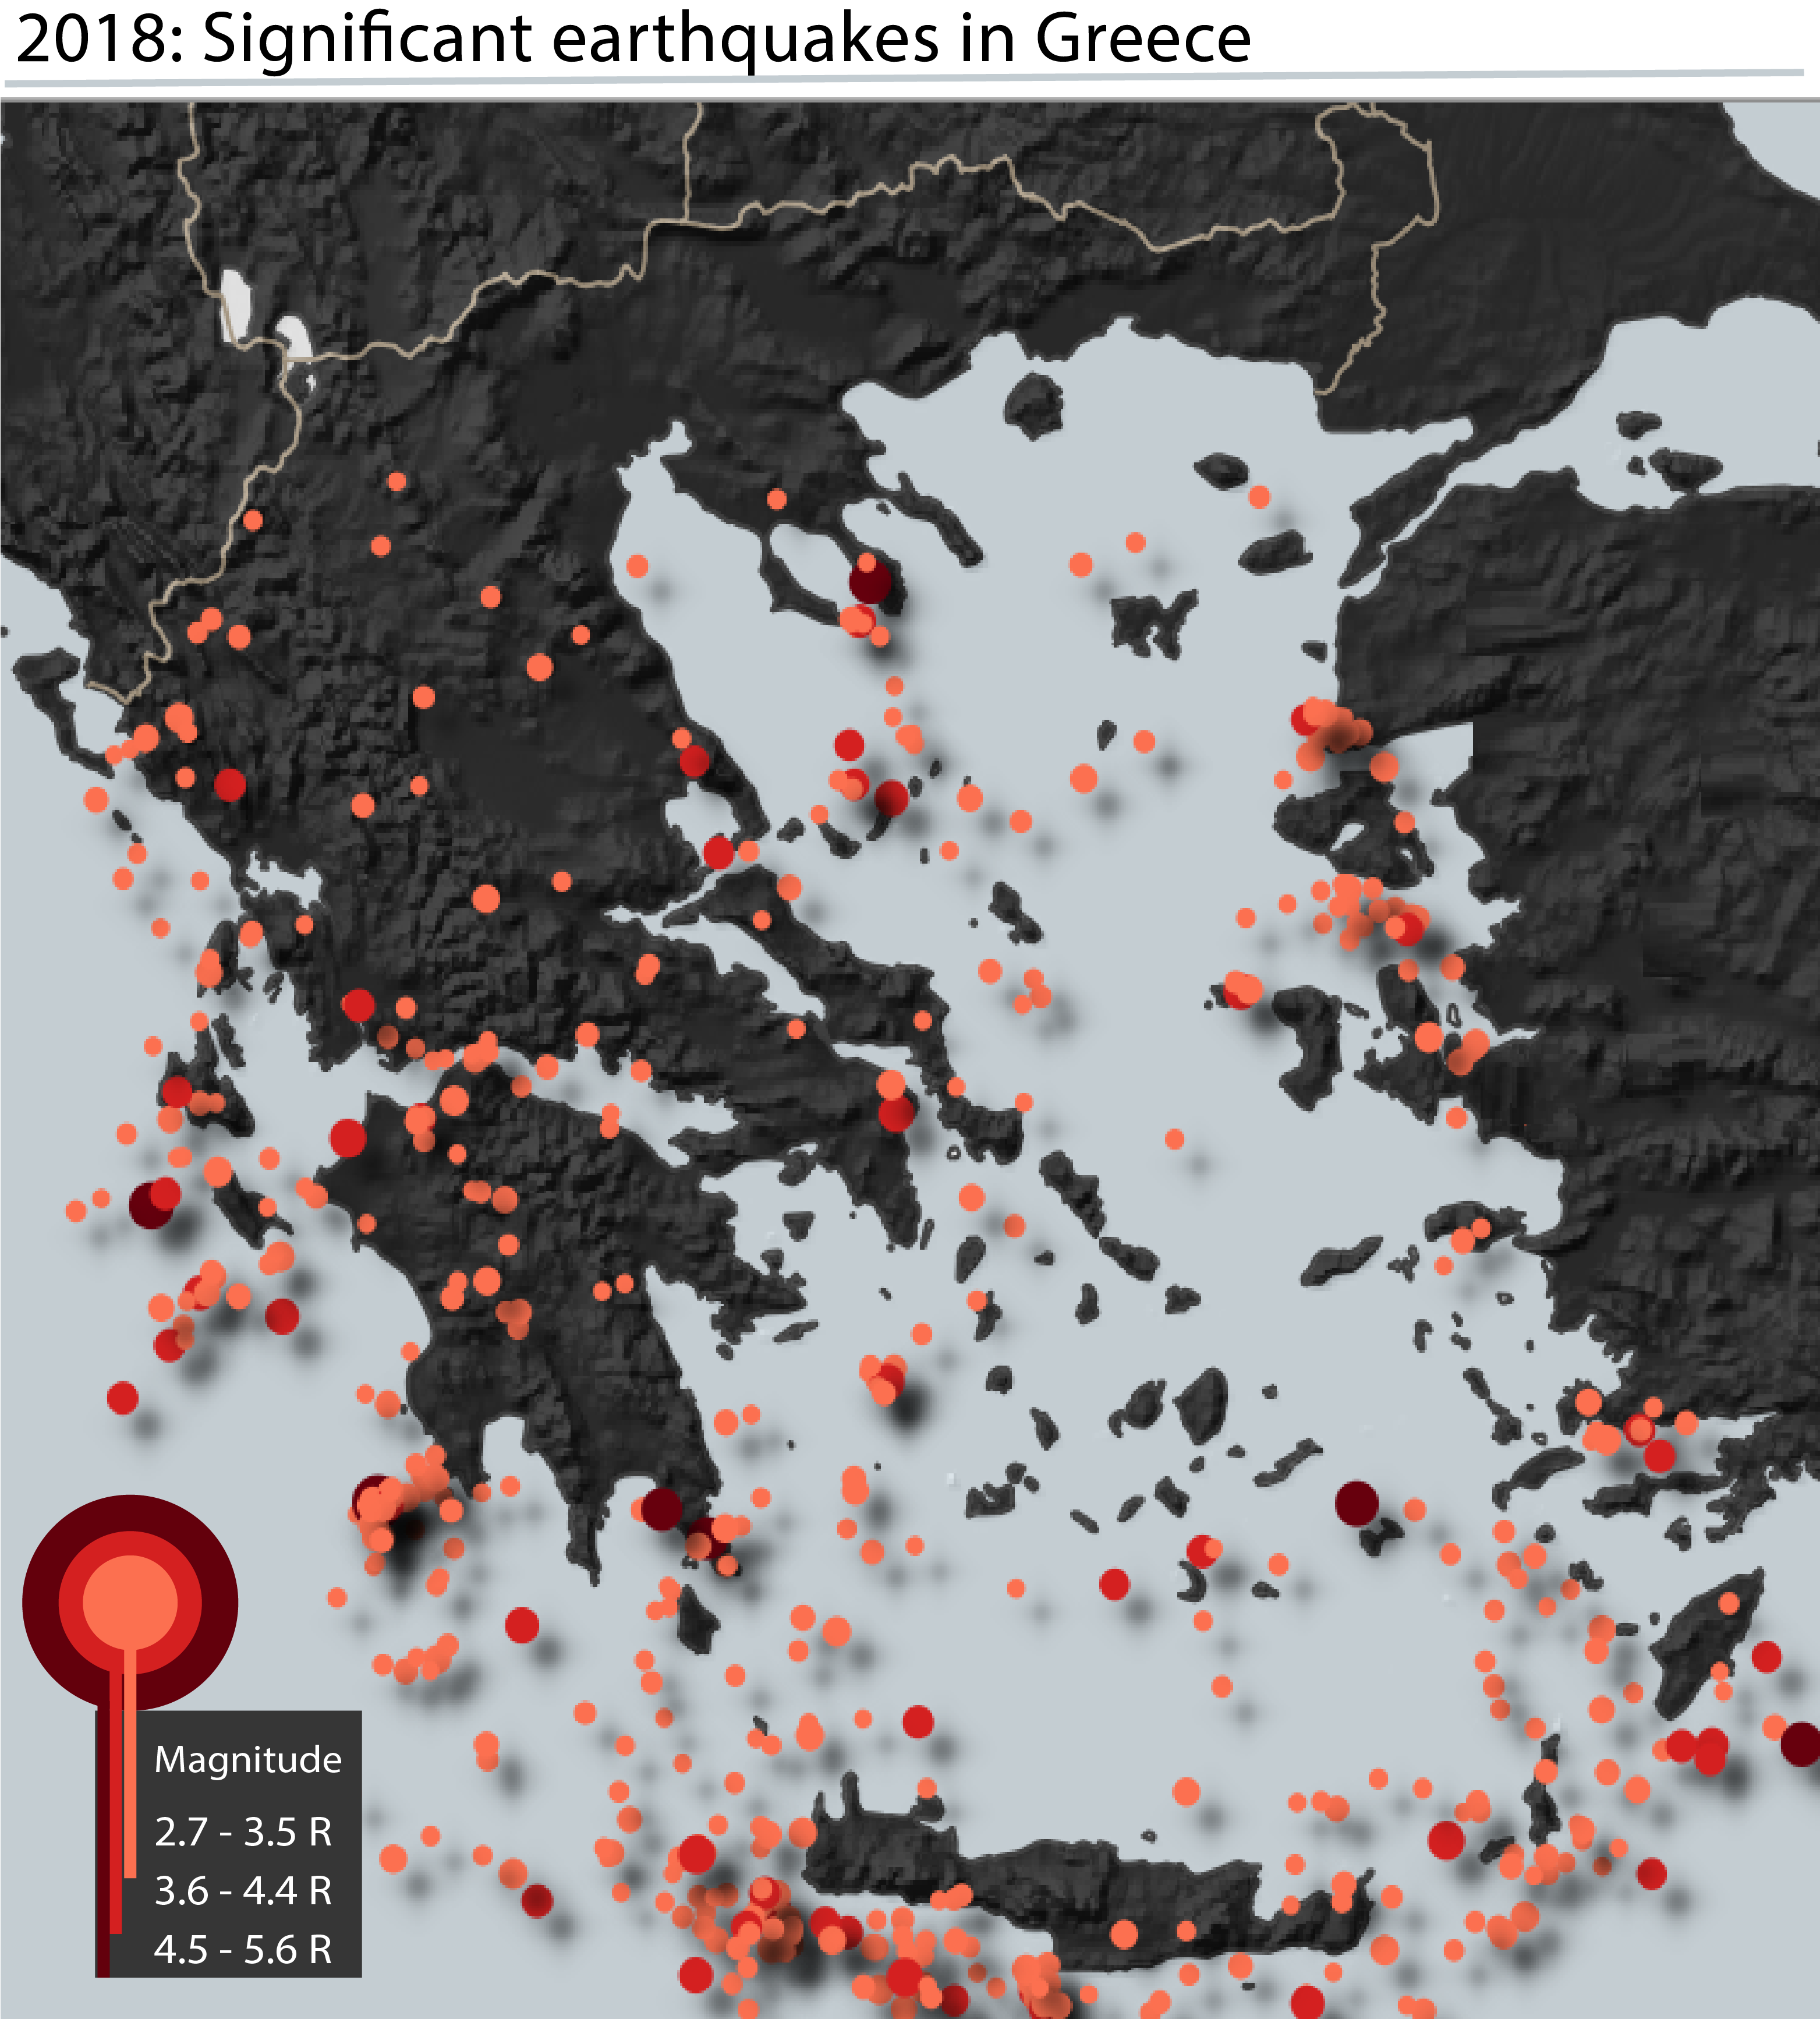

In [72]:
#Mapped on Qgis
Image(filename='map1.png')